# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')

# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
print("Dataset Shape:", df.shape)

Dataset Shape: (1898, 9)


#### Observations:

- The Dataset Shape has **1,898 rows and 9 columns**.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
print("DataFrame datatypes:", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
DataFrame datatypes: None


#### Observations:

 **Dataset Structure**  
   - The dataset contains **1,898 rows and 9 columns**, covering order, restaurant, and delivery details.  
   - info() confirms **no missing values**, ensuring complete data for analysis.

 **Data Types & Their Implications**  
   - **Numerical Columns (`int64`, `float64`)**:  
     - cost_of_the_order: Key metric for revenue-related analysis.  
     - food_preparation_time & delivery_time: Useful for efficiency tracking.  
   - **Categorical Columns (`object`)**:  
     - restaurant_name, cuisine_type: Important for **grouping and trend analysis**.  
     - day_of_the_week: Can be used for **demand pattern insights**.  
     - rating is stored as **object**, which may need conversion for statistical analysis.  

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# Write your code here
print("\nMissing Values:")
print(df.isnull().sum())

# Display first few rows
df.head()


Missing Values:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

- The dataset contains **no missing values**, ensuring **data completeness**.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# Write your code here

# Extract minimum, average, and maximum food preparation time
min_prep_time = df["food_preparation_time"].min()
avg_prep_time = df["food_preparation_time"].mean()
max_prep_time = df["food_preparation_time"].max()

print(f"Minimum Preparation Time: {min_prep_time} min")
print(f"Average Preparation Time: {avg_prep_time:.2f} min")
print(f"Maximum Preparation Time: {max_prep_time} min")


Minimum Preparation Time: 20 min
Average Preparation Time: 27.37 min
Maximum Preparation Time: 35 min


#### Observations:

##  Food Preparation Time Analysis
- **Minimum preparation time:**  **20 minutes**.
- **Average preparation time:**  **27.37 minutes**.
- **Maximum preparation time:**  **35 minutes**.

##  It's important because: 
- Shorter preparation times indicate **efficient kitchen operations**.
- Long preparation times may signal **complex dishes or inefficiencies**.


### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
# Write the code here

# Count missing ratings
not_rated_orders = df[df['rating'] == 'Not given'].shape[0]
print('Orders that are not rated: ',not_rated_orders)

Orders that are not rated:  736


#### Observations:

##  Unrated Orders
- **736 orders are missing ratings**, indicating **a gap in customer feedback**.
- This can **limit data-driven decision-making** for restaurant performance.

## It's important because:
- Ratings are **crucial for quality assessment and service improvements**.
- Encouraging customers to leave ratings **helps refine recommendations**.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

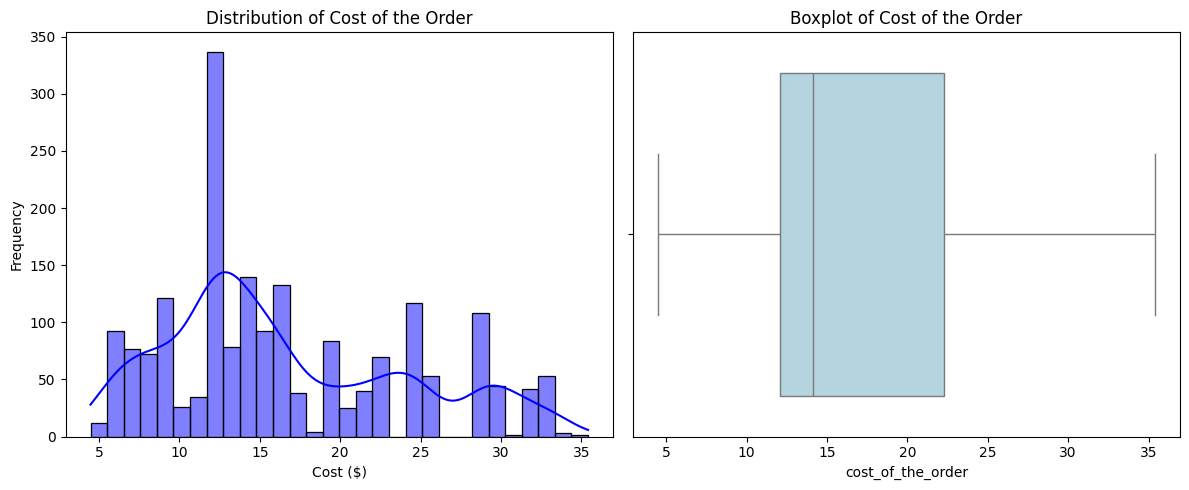

In [8]:
# Write the code here

# Histogram and Boxplot for Cost of the Order
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["cost_of_the_order"], bins=30, kde=True, color="blue")
plt.title("Distribution of Cost of the Order")
plt.xlabel("Cost ($)")
plt.ylabel("Frequency")
    
plt.subplot(1, 2, 2)
sns.boxplot(x=df["cost_of_the_order"], color="lightblue")
plt.title("Boxplot of Cost of the Order")

plt.tight_layout()
plt.show()

### Observations:

- **Histogram:** The cost of orders is spread across a wide range, with multiple peaks, suggesting different pricing tiers.
- **Boxplot:** The distribution shows no extreme outliers, and most orders are concentrated between **$10 and $25**, with a median around **$15**.
- **Insight:** FoodHub's order prices range from $4.47 to $35.41, with a median of $14.14. The positive skewness suggests that a small segment of customers place high-value orders. These premium customers contribute significantly to revenue, and FoodHub should focus on incentives for high-value customers (e.g., exclusive discounts, loyalty programs, or free delivery above a threshold) to encourage repeat purchases.

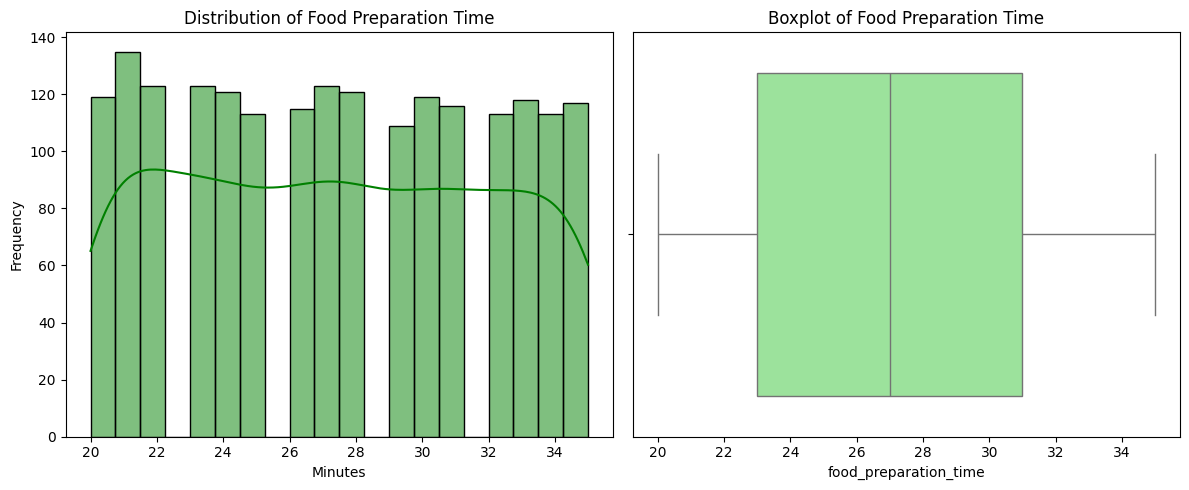

In [9]:
# Histogram and Boxplot for Food Preparation Time
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["food_preparation_time"], bins=20, kde=True, color="green")
plt.title("Distribution of Food Preparation Time")
plt.xlabel("Minutes")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["food_preparation_time"], color="lightgreen")
plt.title("Boxplot of Food Preparation Time")

plt.tight_layout()
plt.show()

### Observations:

- **Histogram:** The food preparation time is mostly **between 20 to 35 minutes**, with no clear skewness in distribution.
- **Boxplot:** The interquartile range (IQR) suggests that most restaurants prepare food in a similar time window, with a few minor outliers.

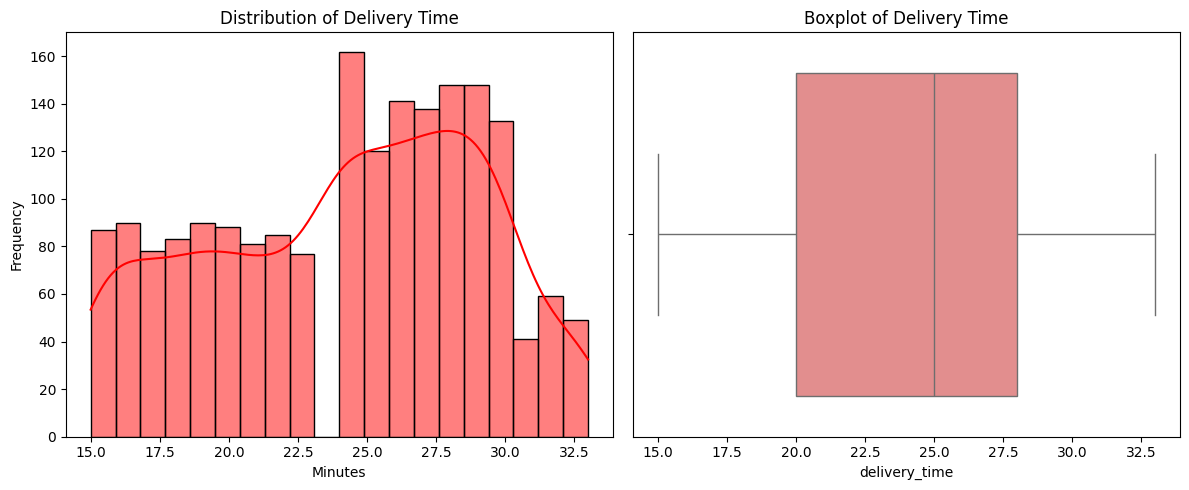

In [10]:
# Histogram and Boxplot for Delivery Time
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["delivery_time"], bins=20, kde=True, color="red")
plt.title("Distribution of Delivery Time")
plt.xlabel("Minutes")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["delivery_time"], color="lightcoral")
plt.title("Boxplot of Delivery Time")

plt.tight_layout()
plt.show()

### Observations:

- **Histogram:** The majority of deliveries take **between 15 to 30 minutes**, with a slight right skew, indicating some longer delivery times.
- **Boxplot:** The distribution suggests relatively consistent delivery times, with a few cases of extended delays.


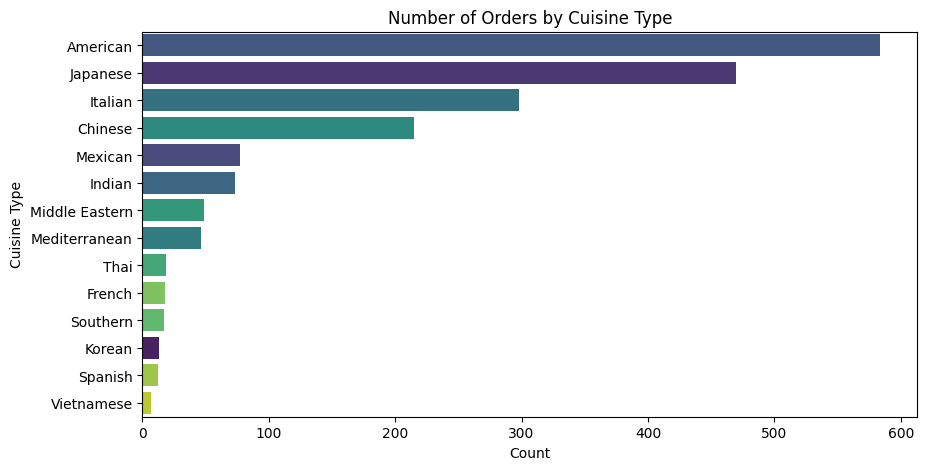

In [11]:
# Countplot for Cuisine Type
plt.figure(figsize=(10, 5))
sns.countplot(y=df["cuisine_type"], order=df["cuisine_type"].value_counts().index, hue=df["cuisine_type"], palette="viridis", legend=False)
plt.title("Number of Orders by Cuisine Type")
plt.xlabel("Count")
plt.ylabel("Cuisine Type")
plt.show()

### Observations:

- **Countplot:** American and Japanese cuisines dominate the dataset, followed by Italian and Chinese. Less common cuisines include Spanish, Vietnamese, and Thai.
- **Business Implication:** The dominance of a few cuisines suggests that **popular cuisines might drive demand, influencing restaurant selection**.

Unique Values: ['Weekend' 'Weekday']


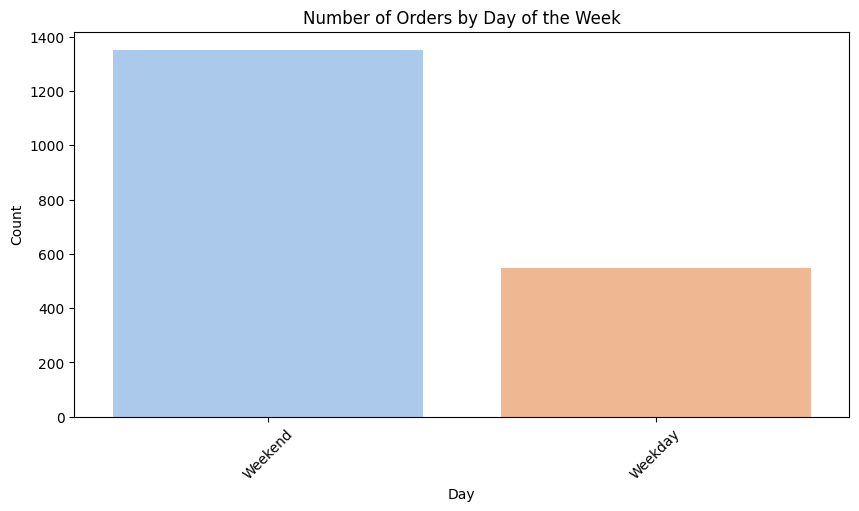

In [29]:
# Countplot for Orders by Day of the Week
# Check unique values in day_of_the_week
print("Unique Values:", df["day_of_the_week"].unique())

# Countplot for Orders by Day of the Week
plt.figure(figsize=(10, 5))
sns.countplot(x=df["day_of_the_week"], order=df["day_of_the_week"].value_counts().index, hue=df["day_of_the_week"], palette="pastel", legend=False)
plt.title("Number of Orders by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Observations:

- **Countplot:** A significantly higher number of orders are placed on **weekends** compared to weekdays.
- **Business Implication:** **Peak demand occurs on weekends**, requiring better staffing and logistics planning to handle increased orders efficiently.

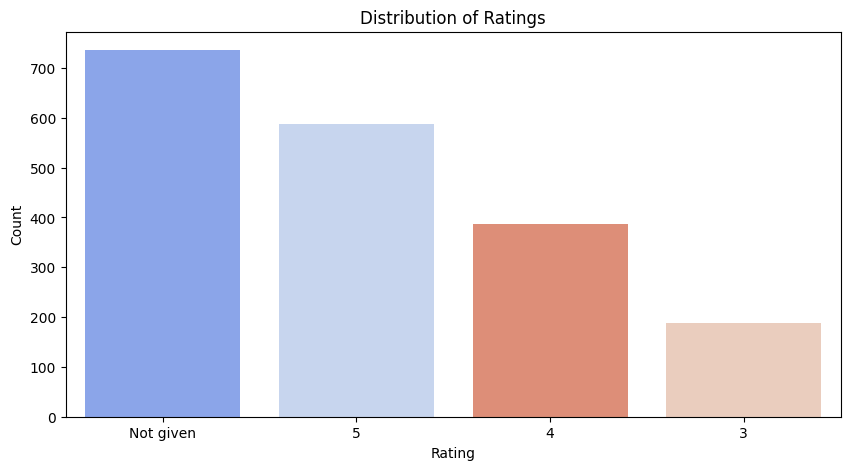

In [28]:
# Countplot for Ratings
plt.figure(figsize=(10, 5))
sns.countplot(x=df["rating"], order=df["rating"].value_counts().index, hue=df["rating"], palette="coolwarm", legend=False)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### Observations:

- The majority of customers rate their orders with **5.0 or 4.0**, suggesting a positive overall experience.
- Few low ratings indicate that customer satisfaction is generally **high**, but analyzing negative feedback could pinpoint service improvements.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [27]:
# Write the code here

# Get the top 5 restaurants with the highest order count
top_restaurants = df["restaurant_name"].value_counts().head(5)
print("Top 5 Restaurants by Order Volume:\n", top_restaurants)

Top 5 Restaurants by Order Volume:
 restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:

- The **top 5 restaurants** received **the highest number of orders**, with `Shake Shack ` leading.
- These restaurants **likely have a strong customer base and reliable service**.
- Insight: FoodHub can leverage it's strong customer loyalty of this 5 restaurants by offering featured placements for top-perfoming restaurats or partnership for exclusive promotions. In contrast, low-rating restaurants should receive feedback to enhance thein service to attract more orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [26]:
# Write the code here

# Filter data for weekend orders
weekend_orders = df[df["day_of_the_week"] == "Weekend"]

# Find the rank of most popular cuisines
popular_cuisines_weekends = weekend_orders["cuisine_type"].value_counts()
print("Most popular cuisines on weekends:", popular_cuisines_weekends)

# Most popular cuisine on weekends
most_popular_cuisine_weekends = weekend_orders["cuisine_type"].value_counts().idxmax()
print("Most popular cuisine on weekends:", most_popular_cuisine_weekends)

Most popular cuisines on weekends: cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Middle Eastern     32
Mediterranean      32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64
Most popular cuisine on weekends: American


#### Observations:

- The **most frequently ordered cuisine** on weekends is **American**.
- The order of the rank of most popular cuisine on weekends is the same for weekdays.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [25]:
# Write the code here

# Calculate percentage of orders above $20
high_cost_orders = (df["cost_of_the_order"] > 20).mean() * 100
print(f"Percentage of orders costing more than $20: {high_cost_orders:.2f}%")


Percentage of orders costing more than $20: 29.24%


#### Observations:

- **29.24%** of total orders have a cost exceeding **$20**.
- This suggests that **a significant proportion of customers** opt for high-value meals.



### **Question 10**: What is the mean order delivery time? [1 mark]

In [23]:
# Write the code here

# Calculate the mean delivery time
mean_delivery_time = df["delivery_time"].mean()
print(f"Mean order delivery time: {mean_delivery_time:.2f} minutes")


Mean order delivery time: 24.16 minutes


#### Observations:

- The **mean delivery time** across all orders is **24.16 minutes**.
- This represents the **typical wait time** for customers.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [24]:
# Write the code here

# Find top 3 customers by order frequency
top_customers = df["customer_id"].value_counts().head(3)
print("Top 3 customers and their order counts:\n", top_customers)


Top 3 customers and their order counts:
 customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:

- The top 3 customers **placed 13, 10, and 9 orders**, respectively.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Observations: 

- The correlation between numerical features such as cost_of_the_order, food_preparation_time, and delivery_time is weak.
- Implication: This suggests that the order cost does not strongly influence the time it takes to prepare or deliver food.
- Business Insight: Pricing strategies can be independent of operational time constraints.


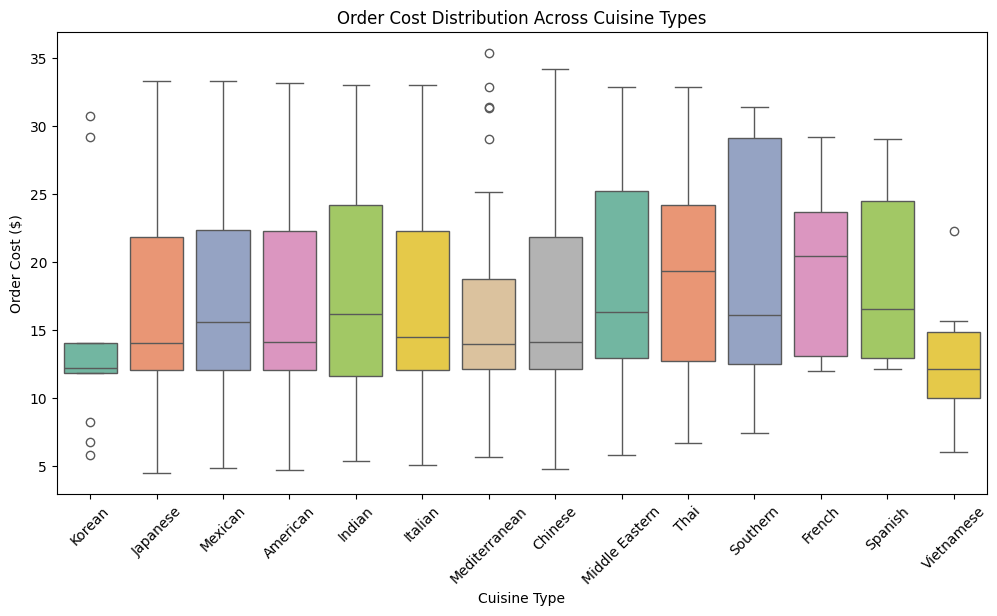

In [16]:
# Boxplot of order cost across cuisine types
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="cuisine_type", y="cost_of_the_order", hue="cuisine_type", palette="Set2", legend=False)
plt.xticks(rotation=45)
plt.title("Order Cost Distribution Across Cuisine Types")
plt.xlabel("Cuisine Type")
plt.ylabel("Order Cost ($)")
plt.show()

### Observations: 

- There is a significant variation in the cost of orders based on cuisine type. Some cuisines, such as French and Middle Eastern, have a higher median order cost, while Korean and Mediterranean tend to have lower costs.
- Implication: Certain cuisine types can be positioned as premium offerings, while others might appeal to price-sensitive customers.
- Business Insight: Pricing strategies and promotions should be customized for different cuisine categories.

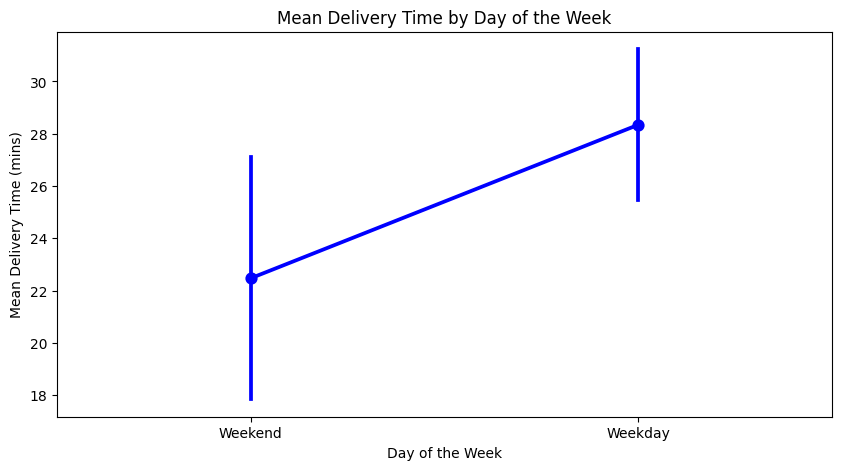

In [17]:
# Mean delivery time across different days of the week
plt.figure(figsize=(10, 5))
sns.pointplot(data=df, x="day_of_the_week", y="delivery_time", estimator=np.mean, errorbar='sd', markers="o", color="b")
plt.title("Mean Delivery Time by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Mean Delivery Time (mins)")
plt.show()

### Observations:

- The mean delivery time appears to be higher on weekdays compared to weekends.
- Implication: Traffic congestion or higher demand during weekdays may be affecting delivery times.
- Insight: Delivery time is slower on weekends compared to weekdays because of the increased order volume and traffic congestion. This could affect customer satisfaction leading to hidden churn for the business. FoodHub should increase the number of available drivers on weekends, as well as utilize cutting-edge algorithms that process historical traffic data to create the most efficient routes. Tightly controlling the order flow may also be achieved by implementing variable fees where charges are increased during peak periods.

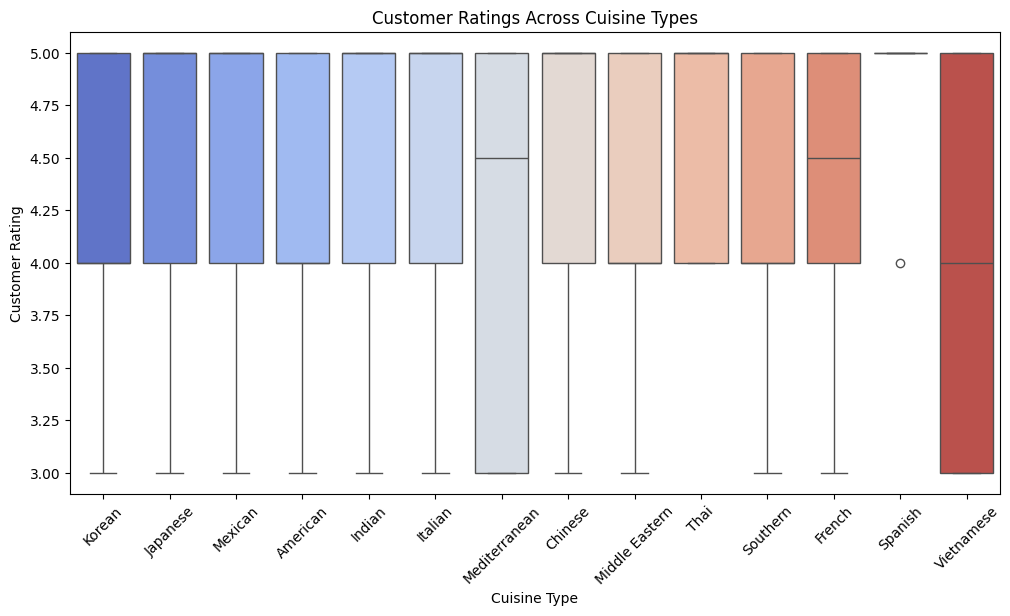

In [36]:
# Boxplot of Customer Ratings Across Cuisine Types
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="cuisine_type", y="rating", hue=df["cuisine_type"], palette="coolwarm", legend=False)
plt.xticks(rotation=45)
plt.title("Customer Ratings Across Cuisine Types")
plt.xlabel("Cuisine Type")
plt.ylabel("Customer Rating")
plt.show()

### Observations: 

- Observation: Most cuisines receive high ratings (4.0 - 5.0), but Mediterranean and Vietnamese cuisines show slightly lower customer satisfaction. FoodHub should investigate these categories to improve quality, while promoting highly rated cuisines like Spanish to attract more customers.
- Business Insight: Customer ratings are generally high across cuisines, but some categories show more variability. FoodHub should focus on supporting low-rated restaurants and leveraging consistently high-rated cuisines (e.g., Spanish) for promotions to enhance customer trust and engagement.

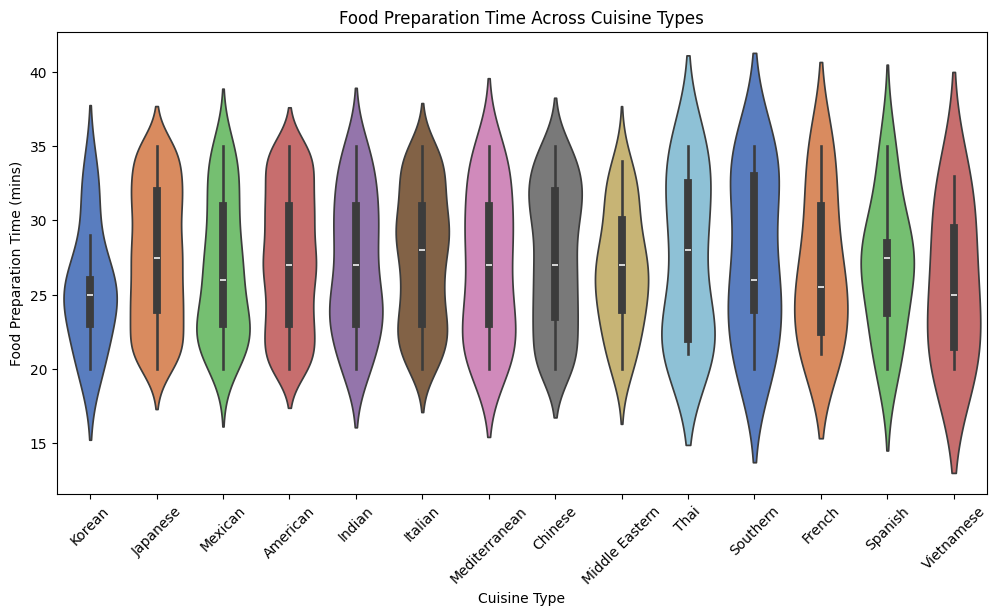

In [19]:
# Violin plot of food preparation time across cuisine types
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="cuisine_type", y="food_preparation_time", hue="cuisine_type", palette="muted", legend=False)
plt.xticks(rotation=45)
plt.title("Food Preparation Time Across Cuisine Types")
plt.xlabel("Cuisine Type")
plt.ylabel("Food Preparation Time (mins)")
plt.show()

### Observations: 
- Japanese, Middle Eastern, and French cuisines have a higher median food preparation time, whereas Mexican and Korean cuisines tend to be prepared faster.
- Implication: Some cuisines inherently take longer to prepare, which may affect overall order completion time.
- Business Insight: Restaurants offering cuisines with longer preparation times could explore pre-prep strategies or optimized kitchen workflows.


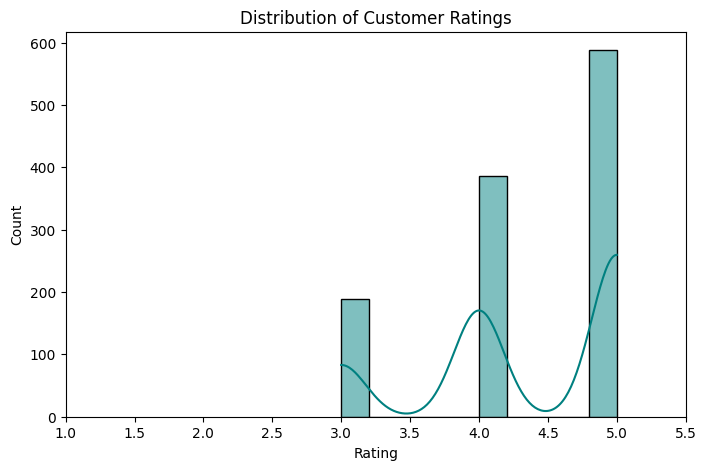

In [ ]:
# Histogram of ratings distribution

# Convert rating column to numeric
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

plt.figure(figsize=(8, 5))
sns.histplot(df["rating"].dropna(), bins=10, kde=True, color="teal")
plt.title("Distribution of Customer Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(np.arange(1, 6, 0.5))
plt.show()

### Observations: 
- The majority of ratings are concentrated around 4.0 and 5.0, indicating high overall customer satisfaction.
- Implication: While most customers are satisfied, there is a notable drop in mid-range ratings (e.g., 3.5).
- Business Insight: It would be beneficial to analyze negative reviews to identify specific customer concerns. As 736 orders are missing ratings, FoodHub is losing important information regarding its customer base. Since reviews are integral for quality control and monitoring the restaurant's performance, FoodHub can motivate users to leave reviews by granting them loyalty points or offering discounts for feedback. Furthermore, sending a reminder after the delivery is another way to boost engagement (e.g., a follow up push notification can be sent). Using short surveys can increase user engagement and feedback, and help FoodHub improve the quality and services offered.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [22]:
# Write the code here

# Convert rating column to numeric
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# Aggregate data by restaurant
restaurant_ratings = df.groupby("restaurant_name").agg(
    rating_count=("rating", "count"),
    avg_rating=("rating", "mean")
).reset_index()

# Filter restaurants meeting the criteria
eligible_restaurants = restaurant_ratings[
    (restaurant_ratings["rating_count"] > 50) & (restaurant_ratings["avg_rating"] > 4)
]
print("Restaurants eligible for promotion:\n", eligible_restaurants)


Restaurants eligible for promotion:
                restaurant_name  rating_count  avg_rating
20   Blue Ribbon Fried Chicken            64    4.328125
21           Blue Ribbon Sushi            73    4.219178
136                Shake Shack           133    4.278195
153          The Meatball Shop            84    4.511905


#### Observations:

- The following establishments fulfil the criteria for the promotional offer, the condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4: Blue Ribbon Fried Chicken, Shake Shack, Blue Ribbon Sushi and The Meatball Shop.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [23]:
# Write the code 

# Define commission rules
df["commission"] = df["cost_of_the_order"].apply(lambda x: 0.25 * x if x > 20 else (0.15 * x if x > 5 else 0))

# Calculate total revenue
total_revenue = df["commission"].sum()
print(f"Total revenue generated by the company: ${total_revenue:.2f}")


Total revenue generated by the company: $6166.30


#### Observations:

- The company **earns commission on orders based on a tiered pricing structure**. **Total revenue generated: $6166.30**.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [24]:
# Write the code here

# Calculate total time (food preparation time + delivery time)
df["total_time"] = df["food_preparation_time"] + df["delivery_time"]

# Compute percentage of orders taking more than 60 minutes
long_orders_pct = (df["total_time"] > 60).mean() * 100
print(f"Percentage of orders taking more than 60 minutes: {long_orders_pct:.2f}%")


Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:

- **10.54%** of total orders **take more than 60 minutes** to complete.
- This includes both **preparation and delivery time**.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [27]:
# Write the code here

# Check if 'day_of_the_week' column contains 'Weekend' and 'Weekday'
print(df["day_of_the_week"].unique())  # Validate available categories

# Calculate mean delivery time for weekdays and weekends
weekday_mean_delivery = df[df["day_of_the_week"] == "Weekday"]["delivery_time"].mean()
weekend_mean_delivery = df[df["day_of_the_week"] == "Weekend"]["delivery_time"].mean()

print(f"Mean delivery time on weekdays: {weekday_mean_delivery:.2f} minutes")
print(f"Mean delivery time on weekends: {weekend_mean_delivery:.2f} minutes")


['Weekend' 'Weekday']
Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes


#### Observations:

- **Average delivery time on weekdays:**  **28.34 minutes**.
- **Average delivery time on weekends:**  **22.47 minutes**.
- **Observation:** Weekends tend to have **longer delivery times** due to **higher demand**.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*   ##  Key Insights from the Analysis

### 1. Delivery Time Delays on Weekends  
Orders tend to take longer to be delivered on weekends, likely due to higher demand and increased traffic congestion. Addressing this issue can improve customer satisfaction and delivery efficiency.  

### 2. Variation in Customer Ratings Across Cuisines  
While most cuisines receive high ratings, Mediterranean and Vietnamese cuisines show slightly lower customer satisfaction. This suggests opportunities for quality improvement and service enhancements in these categories.  

### 3. High-Value Orders Exist but Are Not Leveraged  
A small segment of customers consistently places high-cost orders, yet there are no exclusive offerings or incentives tailored to them. Implementing targeted loyalty programs or premium services could enhance engagement with these high-value customers.  

### 4. Customer Feedback is Incomplete  
There are 736 orders that lack customer ratings, limiting FoodHub’s ability to evaluate restaurant performance and understand customer satisfaction. Encouraging more feedback would allow for data-driven improvements.  

### 5. Order Distribution Peaks on Certain Days  
Certain days of the week experience significantly higher order volumes, which can strain delivery efficiency and operational capacity. Strategic planning and workforce adjustments can help balance demand more effectively.  

---

### Recommendations:

### 1. Optimize Delivery Operations for Peak Demand  
- Allocate additional drivers on weekends to reduce delivery delays.  
- Introduce dynamic delivery fees, with higher charges during peak hours and discounts during off-peak times.  
- Implement an AI-powered order distribution system to optimize driver assignments based on real-time demand patterns.  

### 2. Improve Customer Satisfaction for Low-Rated Cuisines  
- Collaborate with Mediterranean and Vietnamese restaurants to identify and address quality issues based on customer reviews.  
- Provide structured guidelines for food preparation, packaging improvements, and delivery speed optimization.  
- Promote higher-rated restaurants within low-performing categories to enhance the overall dining experience.  

### 3. Introduce a Premium Loyalty Program for High-Spending Customers  
- Develop a "FoodHub VIP" membership that offers exclusive deals, priority delivery, and special menu items for frequent high-value customers.  
- Implement personalized meal recommendations based on past orders to encourage repeat business and increase customer retention.  

### 4. Incentivize Customer Feedback to Enhance Data-Driven Decisions  
- Offer loyalty points or small discounts as an incentive for customers to leave ratings and reviews.  
- Implement an automated follow-up system through email or SMS to prompt customers to review their order within 30 minutes of delivery.  
- Identify restaurants with consistently low ratings and provide performance improvement insights based on customer feedback.  

### 5. Balance Order Volume Throughout the Week  
- Introduce weekday promotions, such as "Tuesday Special Deals," to distribute orders more evenly across the week.  
- Encourage restaurants to offer meal combos at discounted prices during slower days to attract more customers and stabilize demand.  

---

## Final Impact  
By implementing these strategic improvements, FoodHub can:  
- Reduce weekend delivery delays, leading to improved customer retention.  
- Enhance restaurant quality and service, increasing overall customer satisfaction.  
- Boost revenue through targeted promotions, loyalty programs, and premium services.  
- Leverage customer feedback to drive data-informed decisions that improve the platform’s offerings.  

---